Importing Libaries

In [54]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import tensorflow.keras as tk 
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [55]:
## Loading Fashion MNIST dataset from Keras
df=keras.datasets.fashion_mnist.load_data()
df

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [56]:
(X_train,y_train),(X_test,y_test)=df

In [57]:
X_train.shape , X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [58]:
y_train.shape , y_test.shape

((60000,), (10000,))

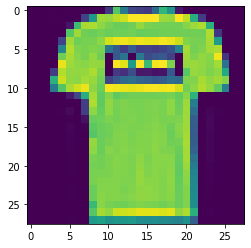

In [59]:
plt.imshow(X_train[1]);


In [60]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

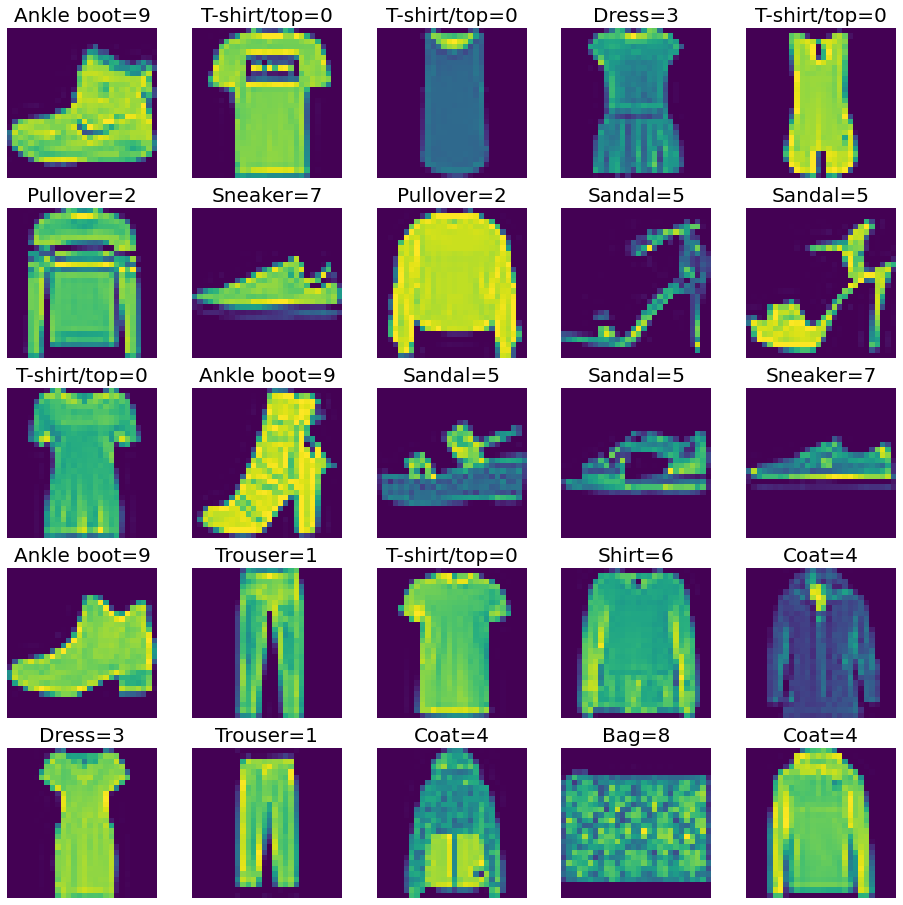

In [61]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i])
  plt.axis('off')
  plt.title(class_labels[y_train[i]]+"="+str(y_train[i]), fontsize=20)

In [62]:
X_train[1].shape

(28, 28)

In [63]:
28*28

784

Feature scaling

In [64]:
X_train = X_train/255
X_test = X_test /255

In [65]:
X_train.shape

(60000, 28, 28)

Building neural network

In [66]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(units=32,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')
])

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [69]:
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 15s 7ms/step - loss: 0.5636 - accuracy: 0.8054
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4248 - accuracy: 0.8508
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3917 - accuracy: 0.8614


In [70]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3690 - accuracy: 0.8673
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3501 - accuracy: 0.8743
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3373 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3283 - accuracy: 0.8803
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3188 - accuracy: 0.8831
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3097 - accuracy: 0.8881
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3048 - accuracy: 0.8892
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2990 - accuracy: 0.8896
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2937 - accuracy: 0.8926
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.288

Test and Evaluate the model

In [71]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3798 - accuracy: 0.8682


[0.37978631258010864, 0.8682000041007996]

predictions

In [72]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [73]:
y_pred[3].argmax()

1

In [74]:
y_test[3]

1

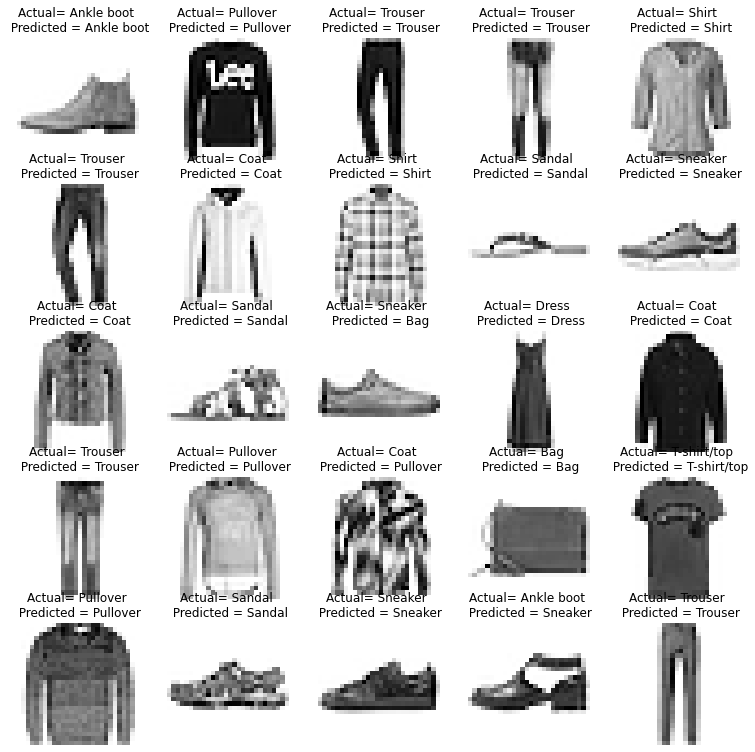

In [75]:
plt.figure(figsize=(13,13))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i],cmap="Greys")
  plt.axis('off')
  plt.title("Actual= {} \n Predicted = {}".format(class_labels[y_test[i]], class_labels[np.argmax(y_pred[i])]))

Confusion Matrix

In [81]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
# from sklearn.metrics import confusion matrix

cm=confusion_matrix(y_test,[np.argmax(i)for i in y_pred])

<AxesSubplot:>

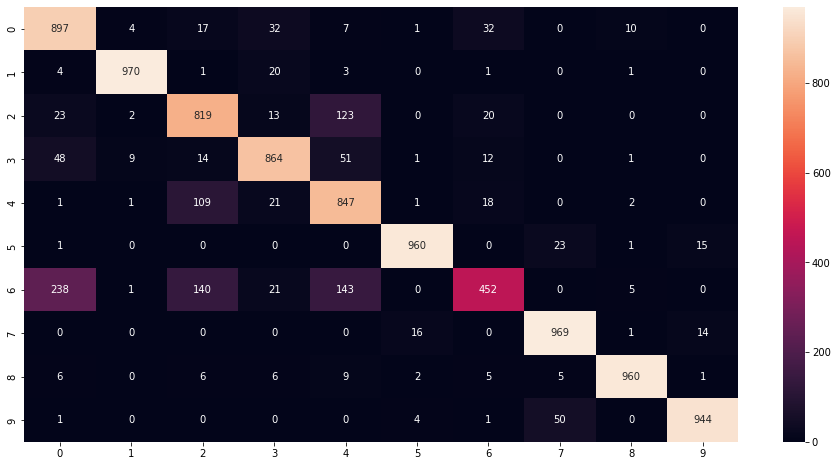

In [84]:
plt.figure(figsize=(16,8))
sns.heatmap(cm,annot=True,fmt='d')

From above confusion  matrix we seen that model get confused in some results
* i.e 1. Shirt

Labels
'''
* 0 => T-shirt/top 
*1 => Trouser 
*2 => Pullover 
* 3 => Dress 
*4 => Coat 
*5 => Sandal 
*6 => Shirt 
*7 => Sneaker 
*8 => Bag 
*9 => Ankle boot '''


## Classification Report 

In [87]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, [ np.argmax(i) for i in y_pred], target_names = class_labels,)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.74      0.90      0.81      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.74      0.82      0.78      1000
       Dress       0.88      0.86      0.87      1000
        Coat       0.72      0.85      0.78      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.84      0.45      0.59      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.97      0.94      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.86     10000
weighted avg       0.87      0.87      0.86     10000



Saving model

In [88]:
model.save('Fashion_mnist.h5')

In [94]:
model= keras.models.load_model('Fashion_mnist.h5')

In [95]:
model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[9.3737680e-07, 8.8445584e-10, 4.1716092e-07, ..., 4.8903126e-02,
        1.8827357e-05, 8.8142014e-01],
       [7.2151656e-06, 7.4747309e-12, 9.6915054e-01, ..., 6.4092594e-17,
        2.3132950e-08, 5.0708901e-19],
       [5.2130026e-06, 9.9999219e-01, 9.4909716e-08, ..., 4.7778897e-15,
        2.0631878e-08, 9.3635915e-20],
       ...,
       [6.3408697e-03, 2.9576421e-09, 1.0866731e-04, ..., 1.3666402e-08,
        9.9286973e-01, 6.6199130e-11],
       [2.8206475e-07, 9.9987870e-01, 2.2006004e-06, ..., 5.7993766e-11,
        1.8775420e-08, 5.2291399e-10],
       [5.3111919e-05, 1.7670943e-06, 1.2847087e-04, ..., 1.7718423e-02,
        1.0151921e-03, 1.0530602e-04]], dtype=float32)

In [76]:
from keras.saving.legacy import model_config
model_config

<module 'keras.saving.legacy.model_config' from '/usr/local/lib/python3.8/dist-packages/keras/saving/legacy/model_config.py'>